# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

이번에 사용할 데이터는 머신러닝 라이브러리인 사이킷런 에서 제공하는 당뇨병 환자 데이터이다.  
일단 필요한 패키지 및 모듈을 가져오자.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## (1) 데이터 가져오기  
아까 import한 sklearn.datasets의 load_diabetes 함수를 사용해서 데이터를 가져올 수 있다.

In [2]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
print(diabetes.feature_names)
print(diabetes.target)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

10개의 feature와 target 데이터에는 당뇨병 수치가 저장되어 있다.  
이 데이터를 학습하기 위해 data와 target을 따로 변수에 담아준다.

In [4]:
df_X = diabetes.data
df_y = diabetes.target
print(type(df_X), type(df_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


사이킷런에서 제공해주는 데이터가 기본적으로 numpy array로 되어 있어서 따로 변환해줄 필요는 없다.

## (2) train 데이터와 test 데이터로 분리하기  
이제 train_test_split 함수를 이용해 학습용 데이터와 테스트용 데이터를 분리해주자.

In [5]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.3, random_state=1)

## (3) 모델 준비하기  
이제 훈련용 데이터와 테스트용 데이터는 준비가 되었고, 데이터를 학습할 때 사용할 가중치와 편향값을 설정해주자.  
해당 데이터셋은 10개의 칼럼을 가지고 있기 떄문에 가중치를 10개로 설정해야 한다. 일단 그 값은 랜덤하게 설정해 주도록 하자.

In [6]:
W = np.random.rand(10)
b = np.random.rand()
print(W, '\n', b)

[0.95441264 0.00748603 0.33826393 0.84494274 0.47477139 0.60837151
 0.92166063 0.39810356 0.65230502 0.04865568] 
 0.43232587755889773


이제 준비된 가중치를 각 feature와 곱한 후 b와 함께 모두 더해준다.  
구분하기 쉽게 함수로 구현해 보자.

In [7]:
def model(X, W, b): # X는 학습할 데이터, W는 가중치, b는 상수값(편향)
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * W[i]
  predictions += b
  return predictions

각 입력 데이터에 지금은 랜덤으로 설정되어 있는 가중치를 곱하여 예상 당뇨병 수치를 반환하게 된다.

위에서 데이터에 적용한 모델이 예측한 값을 더 나은 예측을 할 수 있게 하기 위해서는 최적의 가중치 값을 찾아야 한다. 우리는 가중치를 데이터에 적용하고 예측한 값과 실제 값을 비교하여 그 차이만큼 가중치를 조정해 나가야 한다.  
그 과정에서 우리는 손실함수를 사용한다. 예측값과 실제 값의 차이에서 어떻게 가중치를 조정할 것이냐는 여러가지가 있는데 여기서는 오차의 제곱의 평균을 이용하는 MSE를 사용해 보자.

In [8]:
def MSE(a, b):
  return ((a - b) ** 2).mean() # a-b는 오차, 오차를 제곱하여 평균값을 리턴

이제 MSE함수를 사용하여 가중치의 값을 조정하기 위한 손실값을 계산하는 함수를 만들어보자.

In [9]:
def loss(X, W, b, y):
  predictions = model(X, W, b) # 모델을 이용해 값을 예측
  L = MSE(predictions, y) # 실제 값과 예측값을 비교하여 MSE 값을 구함
  return L

loss함수를 통해 MSE를 구했다. 이 때, MSE값이 0에 가까울 수록 좋은 예측을 했다고 볼 수 있을것이다. 현재의 가중치가 최적의 가중치보다 낮다면 음의 기울기를 가질 것이고 높다면 양의 기울기를 가질테니 현재의 기울기를 안다면 가중치를 어떻게 조정해야 할지 알 수 있다.  
기울기를 구하는 공식을 함수를 통해 구현해 주도록 하자.

In [10]:
def gradient(X, W, b, y):
  N = len(W) # 가중치의 수

  y_pred = model(X, W, b) # 값을 예측

  dW = 1/N * 2 * X.T.dot(y_pred - y)

  db = 2 * (y_pred - y).mean()

  return dW, db

머신러닝에서는 학습의 정도에 영향을 미치는 여러 값 중에서 모델이 스스로 학습하는 것이 아닌 사람이 직접 사전에 정의해 주는 파라미터를 하이퍼 파라미터 라고 한다. 여기서 설정할 하이퍼 파라미터는 Learning rate 학습률이다.
학습률은 다음 가중치 변경을 얼마나 할 것인지를 정한다.  
최적의 학습률은 문제마다 다르고 보통 0.1, 0.01을 먼저 사용해 본다고 하니 0.01로 설정한다.

In [11]:
LEARNING_RATE = 0.01

자 이제 여태 만든 함수들을 이용해 모델을 학습시켜 보자.

In [12]:
losses = []

for i in range(1, 2001):
  dW, db = gradient(train_X, W, b, train_y)
  W -= (LEARNING_RATE * dW)
  b -= (LEARNING_RATE * db)
  L = loss(train_X, W, b, train_y)
  losses.append(L)
  if i % 10 == 0:
    print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21728.5388
Iteration 20 : Loss 16221.8672
Iteration 30 : Loss 12495.3151
Iteration 40 : Loss 9961.3613
Iteration 50 : Loss 8227.4607
Iteration 60 : Loss 7031.2321
Iteration 70 : Loss 6197.2019
Iteration 80 : Loss 5607.9324
Iteration 90 : Loss 5184.7507
Iteration 100 : Loss 4874.8847
Iteration 110 : Loss 4642.8751
Iteration 120 : Loss 4464.8412
Iteration 130 : Loss 4324.6519
Iteration 140 : Loss 4211.3676
Iteration 150 : Loss 4117.5313
Iteration 160 : Loss 4038.0264
Iteration 170 : Loss 3969.3122
Iteration 180 : Loss 3908.9129
Iteration 190 : Loss 3855.0744
Iteration 200 : Loss 3806.5352
Iteration 210 : Loss 3762.3711
Iteration 220 : Loss 3721.8916
Iteration 230 : Loss 3684.5695
Iteration 240 : Loss 3649.9931
Iteration 250 : Loss 3617.8338
Iteration 260 : Loss 3587.8236
Iteration 270 : Loss 3559.7400
Iteration 280 : Loss 3533.3946
Iteration 290 : Loss 3508.6262
Iteration 300 : Loss 3485.2947
Iteration 310 : Loss 3463.2774
Iteration 320 : Loss 3442.4656
Iteration 330 

2000번 학습시켜 준 결과 Loss가 거의 2900에 수렴하는 것을 확인할 수 있다.  
이제 테스트 데이터를 이용해 값을 예측해보고 손실함수를 통해 실제 값과의 Loss를 측정해 보자.

In [13]:
pred = model(test_X, W, b)
mse = loss(test_X, W, b, test_y)
print(mse)

2844.9264798996473


예측에 대한 손실함수 계산 결과도 2844로 2900과 비슷한 값이 나온다.  
학습이 잘 되었는지 시각화를 한번 해보고 싶은데 입력 데이터가 너무 많아서 모든 항목을 그래프로 표현하기가 힘들다. 아쉬운대로 칼럼을 하나씩 이용해서 시각화 해보자.

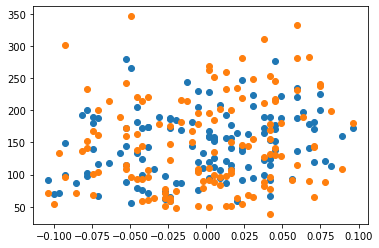

In [14]:
plt.scatter(test_X[:, 0], pred)
plt.scatter(test_X[:, 0], test_y)
plt.show()

다른 칼럼들도 한번 보자.

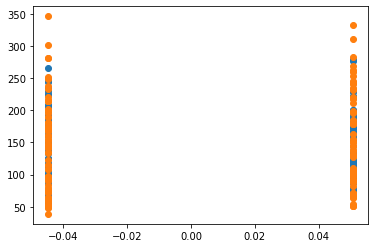

In [15]:
plt.scatter(test_X[:, 1], pred)
plt.scatter(test_X[:, 1], test_y)
plt.show()

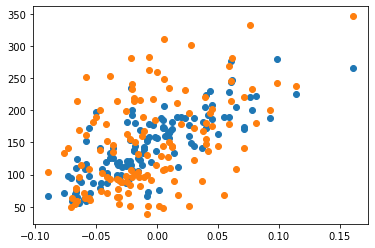

In [16]:
plt.scatter(test_X[:, 2], pred)
plt.scatter(test_X[:, 2], test_y)
plt.show()

성별 칼럼은 두가지로 밖에 분류되지 않아서 구분이 잘 안되지만 다른 그래프는 예측값과 실제 데이터가 비슷하게 분포되어 있는 것 같다.


# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

이번에는 캐글 경진대회에서 제공되는 데이터셋을 이용해서 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거 대여량을 예측하는 모델을 만들어 보자.  
LMS 주피터 노트북의 데이터를 받아서 코랩에 직접 업로드하여 진행할 것이다.

In [17]:
bicycle = pd.read_csv('./bicycle/train.csv')

In [18]:
print(bicycle)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

pandas의 read_csv()함수를 통해 바로 dataFrame 형식의 자전거 대여 데이터세트를 불러왔다. 여기서 우리가 학습할 target은 count이다.  
특징중에 datetime은 문자열 데이터라 학습시키려면 년,월,일 등의 항목을 나눠주는 것이 좋을것 같다. 

In [19]:
print(type(bicycle['datetime'][0]))

bicycle['datetime'] = pd.to_datetime(bicycle['datetime'])

print(type(bicycle['datetime'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


일단 문자열을 to_datetime()을 이용해 날짜 형식의 데이터로 변경하고 날짜 형식의 데이터에서는 쉽게 연, 월, 일 등을 불러올 수 있다. 이제 날짜 데이터를 이용해서 각 칼럼을 추가해 주자.

In [20]:
bicycle['year'] = bicycle['datetime'].dt.year
bicycle['month'] = bicycle['datetime'].dt.month
bicycle['day'] = bicycle['datetime'].dt.day
bicycle['hour'] = bicycle['datetime'].dt.hour
bicycle['minute'] = bicycle['datetime'].dt.minute
bicycle['second'] = bicycle['datetime'].dt.second

In [21]:
bicycle.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


성공적으로 문자열 데이터에서 날짜 데이터를 6개의 칼럼으로 분리했다. 이제 분리해낸 이 날짜데이터를 한번 시각화 해보자.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

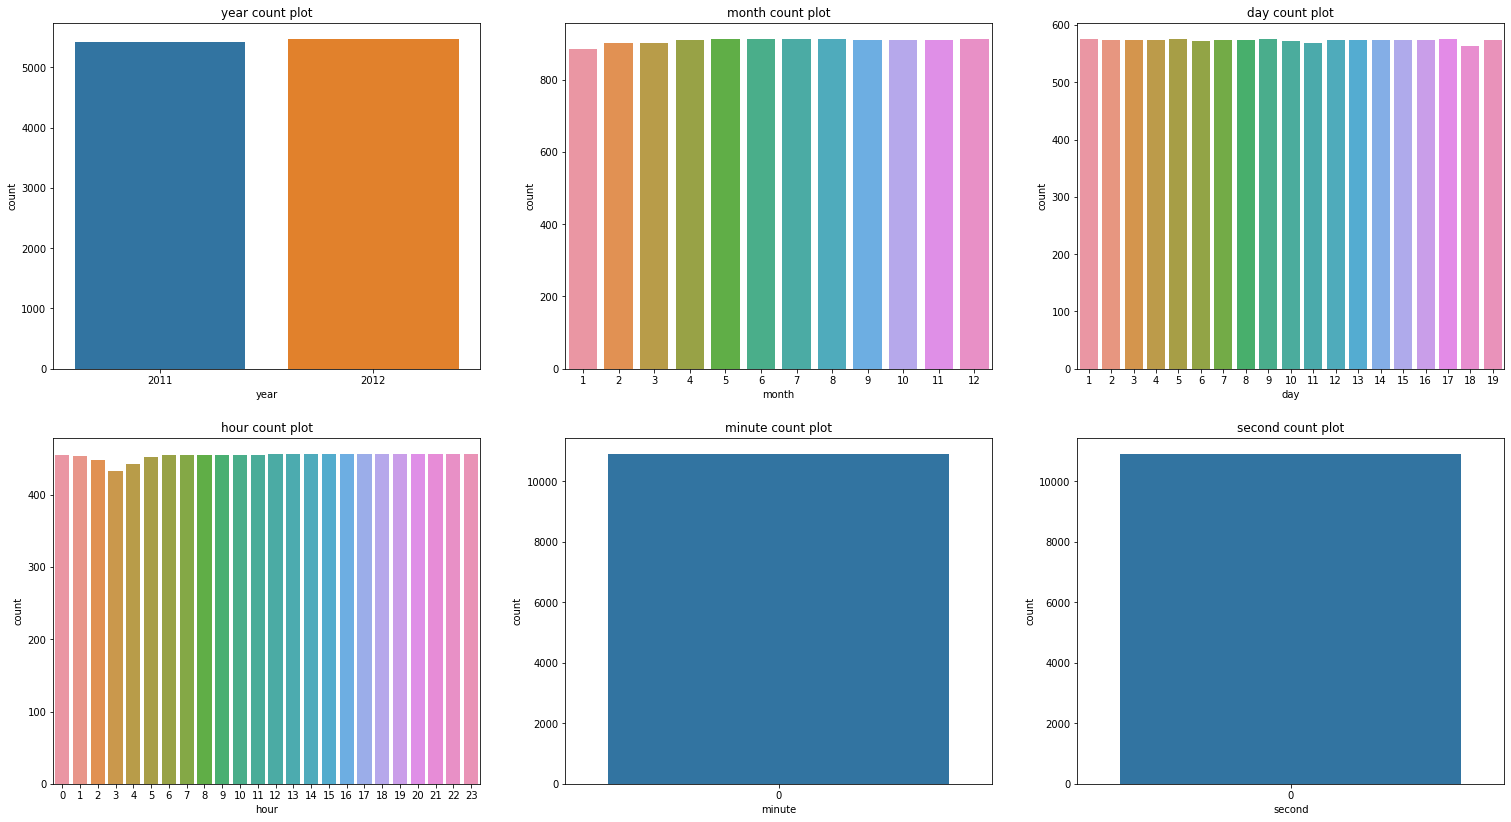

In [22]:
f, ax = plt.subplots(2, 3, figsize = (26, 14))
sns.countplot('year', data=bicycle, ax=ax[0, 0])
ax[0, 0].set_title('year count plot')
sns.countplot('month', data=bicycle, ax=ax[0, 1])
ax[0, 1].set_title('month count plot')
sns.countplot('day', data=bicycle, ax=ax[0, 2])
ax[0, 2].set_title('day count plot')
sns.countplot('hour', data=bicycle, ax=ax[1, 0])
ax[1, 0].set_title('hour count plot')
sns.countplot('minute', data=bicycle, ax=ax[1, 1])
ax[1, 1].set_title('minute count plot')
sns.countplot('second', data=bicycle, ax=ax[1, 2])
ax[1, 2].set_title('second count plot')
plt.show()

LMS에서 countplot을 사용해 보라고 해서 사용해 봤는데 이건 어느 날짜에 대한 수만 나온거라 뭔가 알만한 정보가 없다.  
각 항목별로 count의 평균을 구해서 막대그래프로 표시해보자.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

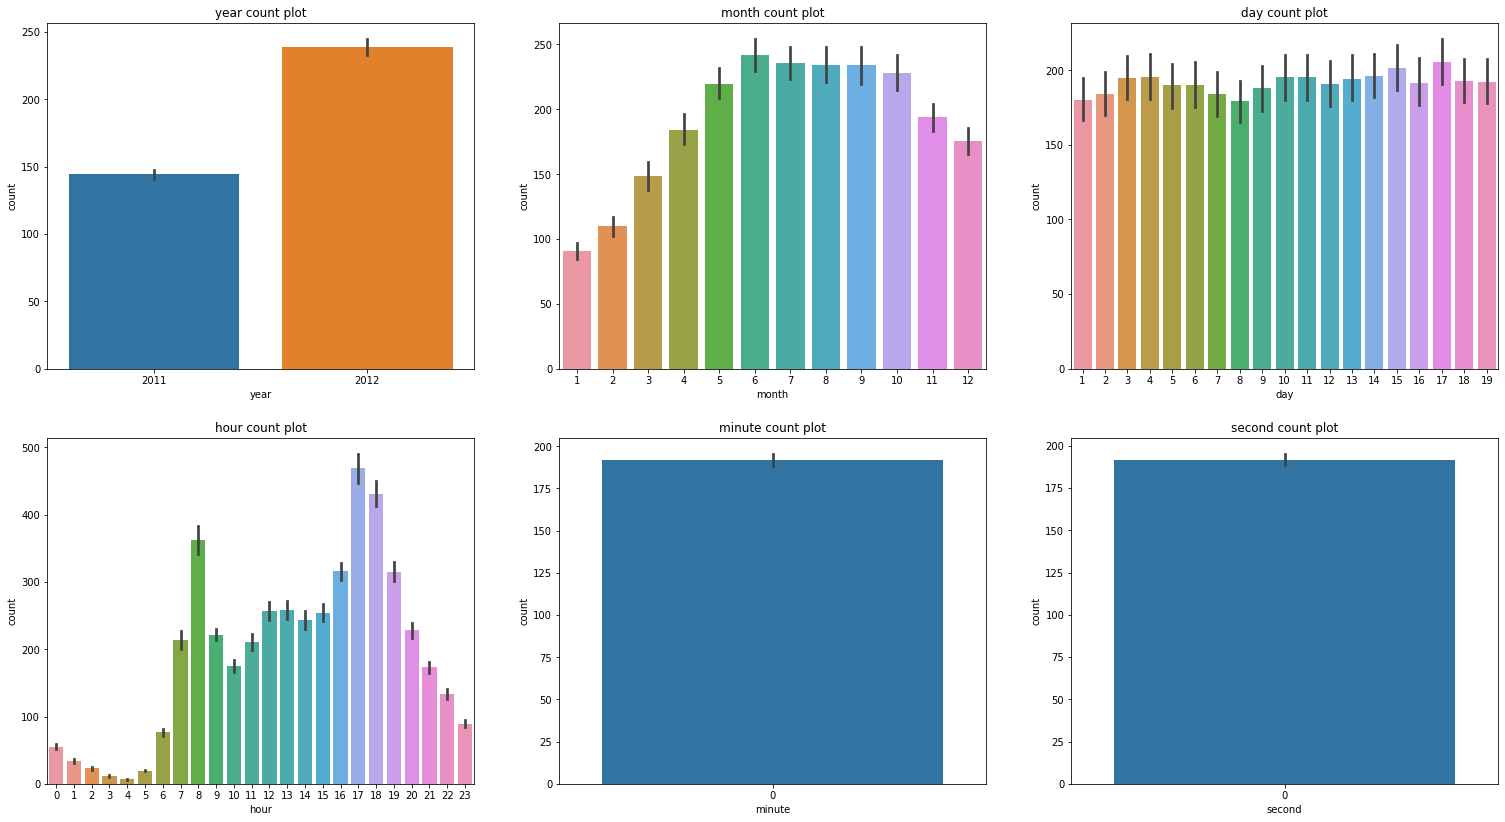

In [23]:
f, ax = plt.subplots(2, 3, figsize = (26, 14))
sns.barplot('year', 'count', data=bicycle, ax=ax[0, 0])
ax[0, 0].set_title('year count plot')
sns.barplot('month', 'count', data=bicycle, ax=ax[0, 1])
ax[0, 1].set_title('month count plot')
sns.barplot('day', 'count', data=bicycle, ax=ax[0, 2])
ax[0, 2].set_title('day count plot')
sns.barplot('hour', 'count', data=bicycle, ax=ax[1, 0])
ax[1, 0].set_title('hour count plot')
sns.barplot('minute', 'count', data=bicycle, ax=ax[1, 1])
ax[1, 1].set_title('minute count plot')
sns.barplot('second', 'count', data=bicycle, ax=ax[1, 2])
ax[1, 2].set_title('second count plot')
plt.show()

hour를 보니 출,퇴근 시간에 자전거 대여수가 많아지고 6~10월 정도에 대여수가 많아진다. minute, second는 모든 값이 00이니 제거해 주도록 하자.

In [24]:
bicycle.drop(labels=['minute', 'second', 'datetime'], axis=1, inplace=True)

다른 데이터를 한번 살펴보자.  
대부분 날짜와 날씨에 관련된 데이터지만 회원수와 비회원 수가 있다. 사실 이 두 값을 더하면 count가 된다. 이 값들은 결과에 너무 큰 영향을 줄 것 같으니 여기서는 한번 제외해보자.

In [25]:
bicycle.drop(labels=['casual', 'registered'], axis=1, inplace=True)

이제 train과 test셋으로 데이터를 분리한다.

In [26]:
train_X, test_X, train_y, test_y = train_test_split(bicycle.drop(labels='count', axis=1), bicycle['count'].values, test_size=0.25, random_state=0)

이제 학습을 시켜보자.  
이번에는 코드를 직접 작성하지 않고 sklearn에서 제공하는 Linear Regression 모델을 불러와서 간단하게 학습시켜 보도록 하자.  
분리된 train을 이용해서 모델에 학습(fit)시키고 test를 이용해서 결과를 예측(predict)한다.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(test_X)

Linear Regression 모델에 대한 학습과 예측이 아주 간단하게 끝냈다. 
pred에는 해당 모델을 학습시켜 얻어낸 가중치를 이용해서 test_X 데이터의 예상 자전거 대여수를 예측한 값이 들어간다.  
예측한 모델의 Loss를 한번 계산해 보자.  
이번에는 RMSE를 구하는 손실함수를 구현해 볼건데, RMSE는 아까 구했던 MSE에 제곱근의 형식만 적용해 주면 간단하게 구할 수 있다.

In [28]:
def loss_by_MSE_RMSE(pred, y):
  mse = ((pred - y) ** 2).mean()
  rmse = mse ** 0.5
  return mse, rmse

In [29]:
mse, rmse = loss_by_MSE_RMSE(pred, test_y)
print('MSE :', mse)
print('RMSE :', rmse)

MSE : 19770.628526805787
RMSE : 140.60806707584663


MSE는 19770, RMSE는 140 정도가 나온다.  
이제 예측 결과를 scatter plot으로 시각화 해보자.  
데이터가 너무 많아서 pred와 실제 값을 함께 뽑으니 너무 정신이 없어서 따로 출력하도록 한다.

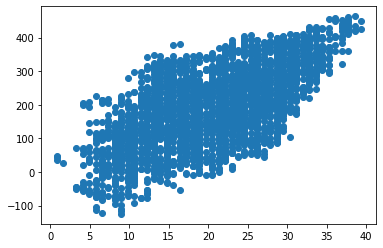

In [30]:
plt.scatter(test_X['temp'], pred)
plt.show()

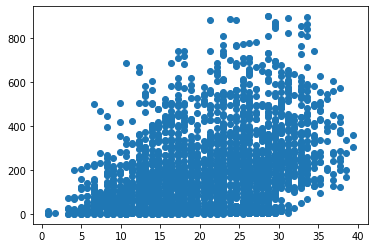

In [31]:
plt.scatter(test_X['temp'], test_y)
plt.show()

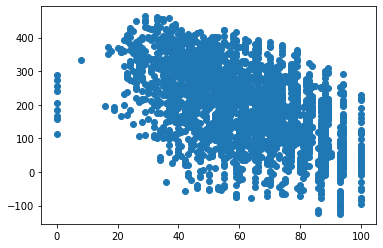

In [32]:
plt.scatter(test_X['humidity'], pred)
plt.show()

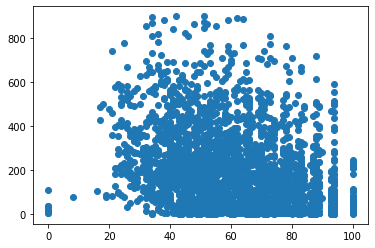

In [33]:
plt.scatter(test_X['humidity'], test_y)
plt.show()

각각 온도와 습도에 대한 count 예측값과 실제 값을 비교해 보았는데 예측값에서 음수의 값이 나오고 있다. 음수가 나온 부분을 자르고 보면 전체적인 분포도가 비슷한 것 같다.

## 회고
- 자전거 대여수를 예측하는 문제이기 때문에 예측값이 음수가 나오면 안될것 같은데 음수가 나온다. 캐글필사에서 같은 문제를 다루고 있으니 이 부분을 개선시켜 볼 수 있으면 좋을 것 같다.
- 회귀문제에서의 예측값 시각화를 여기서는 scatter로 진행했는데 데이터 수가 많아지니까 점이 겹쳐서 너무 지저분하게 보인다. 더 좋은 방법이 없을까 싶어서 찾아보다가 scatterplot에서 jitter를 사용하면 조금 정돈된 결과를 볼 수 있다고 하는데 원래 값이 변형된다고 해서 적용을 하지는 않았다. 다른 좋은 방법이 있으면 적용해 보고 싶다.
- 회원, 비회원 칼럼을 제외하지 않고 학습을 하면 어떨지 궁금해서 제외하지 않은 채로 돌려봤는데 예상대로 거의 결과와 일치하는 학습결과과 나왔다. 이 많은 특징중에서 결과와 관련되는 값을 찾아서 그 값에 맞춰서 학습이 진행된다는 것이 신기했다.